# Wave Propagation Method and BPM in 3D

WPM method is very fast. It is based on S. Schmidt et al., “Wave-optical modeling beyond the thin-element-approximation,” Opt. Express, vol. 24, no. 26, p. 30188, 2016.


In [1]:
from diffractio import np, um

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ

## Propagation at vacuum

In [2]:
x = np.linspace(-50 * um, 50 * um, 256)
y = np.linspace(-50 * um, 50 * um, 256)
z = np.linspace(0, 500 * um, 256)
wavelength = 0.6 * um

In [3]:
t0 = Scalar_mask_XY(x, y, wavelength)
t0.circle(r0=(0 * um, 0 * um), radius=45 * um, angle=0)

In [4]:
u = Scalar_mask_XYZ(x, y, z, wavelength)
u.incident_field(u0=t0)

## WPM

In [5]:
%%time
u.clear_field()
u.WPM(verbose=True, has_edges=True)


Time = 2.13 s, time/loop = 8.324 ms
CPU times: user 1.93 s, sys: 263 ms, total: 2.2 s
Wall time: 2.19 s


<Figure size 480x360 with 0 Axes>

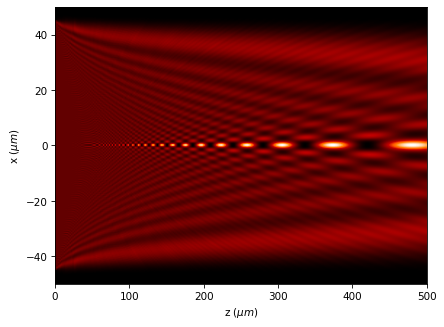

In [6]:
u.draw_XZ(y0=0, logarithm=False)

## BPM

CPU times: user 1.09 s, sys: 61.9 ms, total: 1.15 s
Wall time: 1.15 s


<Figure size 480x360 with 0 Axes>

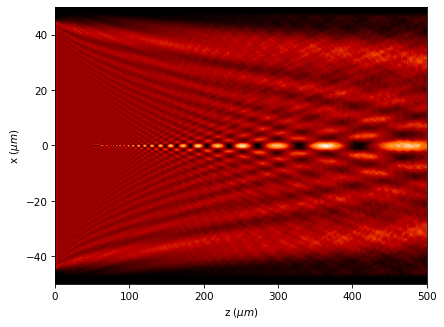

In [7]:
%%time
u.clear_field()
u.BPM(verbose=True, has_edges=True)
u.draw_XZ(y0=0, logarithm=True);

At vacuum both techniques work fine.

## Diffraction by an sphere

WPM and BPM also allow propagation through a XYZ refractive index structure.


In [8]:
x = np.linspace(-15 * um, 15 * um, 256)
y = np.linspace(-15 * um, 15 * um, 256)
z = np.linspace(0, 30 * um, 256)
wavelength = 0.6328 * um

In [9]:
t0 = Scalar_mask_XY(x, y, wavelength)
t0.circle(r0=(0 * um, 0 * um), radius=12.5 * um, angle=0)

u0 = Scalar_source_XY(x, y, wavelength)
u0.plane_wave(A=1)

In [11]:
u = Scalar_mask_XYZ(x, y, z, wavelength)
u.sphere(r0=(0, 0, 12.5), radius=10 * um, refractive_index=2, rotation=None)

In [12]:
u.incident_field(u0=u0 * t0)

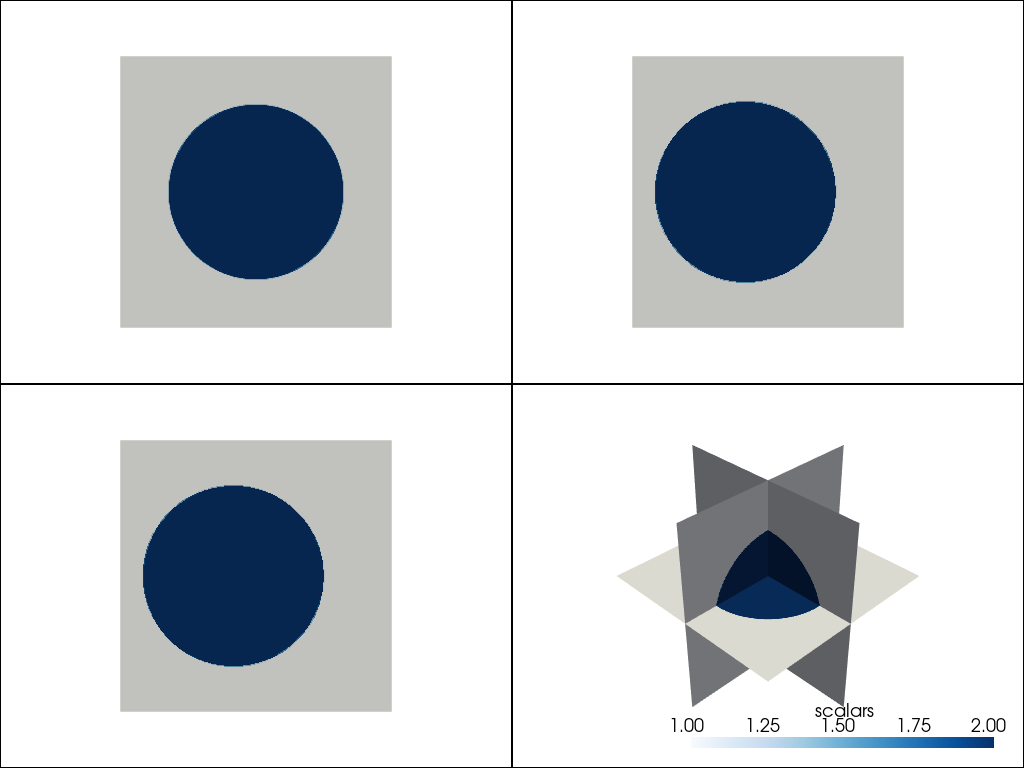

In [15]:
u.draw_XYZ(kind='refractive_index', drawing='projections')

### WPM

In [16]:
%%time
u.clear_field()
u.WPM(verbose=True,has_edges=True)

Time = 2.71 s, time/loop = 10.6 ms
CPU times: user 2.73 s, sys: 66.4 ms, total: 2.8 s
Wall time: 2.79 s


<Figure size 480x360 with 0 Axes>

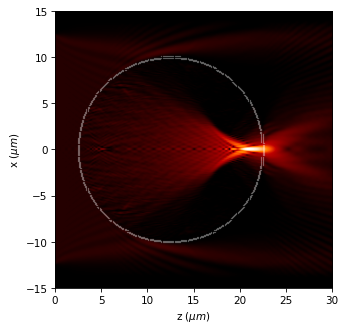

In [17]:
u.draw_XZ(y0=0, logarithm=True, scale="scaled", draw_borders=True)

In [18]:
u2 = u.cut_resample([-10, 10], [-10, 10], num_points=(128, 128, 128), new_field=True)

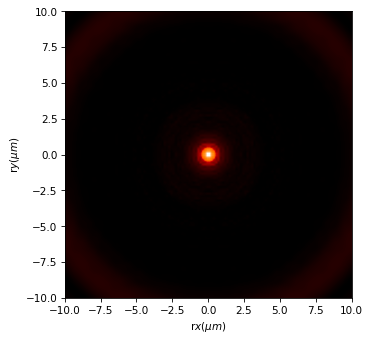

In [19]:
u2.draw_XY(z0=20.5, logarithm=True)

In [20]:
# u.draw_XYZ(logarithm=True)

### BPM

In [21]:
%%time
u.clear_field()
u.BPM(verbose=True,has_edges=True)

CPU times: user 1.13 s, sys: 63.1 ms, total: 1.19 s
Wall time: 1.19 s


<Figure size 480x360 with 0 Axes>

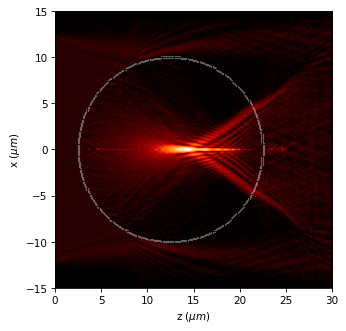

In [25]:
u.draw_XZ(y0=0, logarithm=True, scale="scaled", draw_borders=True)

In this case, the results are quite different. As the difference of refractive indexes is high, WPM produces better results.